In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, how='left', on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = combined_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)

# Preview DataFrame
mean_tumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = combined_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
sem_tumor_vol = pd.DataFrame(sem_tumor_vol)
# Preview DataFrame
sem_tumor_vol.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol = mean_tumor_vol.reset_index()
mean_tumor_vol_pivot = mean_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

sem_tumor_vol = sem_tumor_vol.reset_index()
sem_tumor_vol_pivot = sem_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
sem_tumor_vol_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


<function matplotlib.pyplot.show(*args, **kw)>

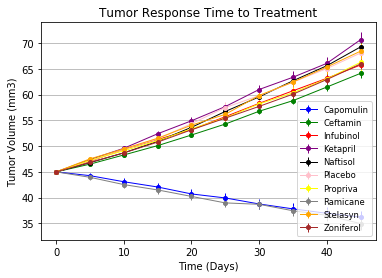

In [39]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Capomulin"], yerr=sem_tumor_vol_pivot["Capomulin"], color="blue", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Ceftamin"], yerr=sem_tumor_vol_pivot["Ceftamin"], color="green", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Infubinol"], yerr=sem_tumor_vol_pivot["Infubinol"], color="red", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Ketapril"], yerr=sem_tumor_vol_pivot["Ketapril"], color="purple", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Naftisol"], yerr=sem_tumor_vol_pivot["Naftisol"], color="black", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Placebo"], yerr=sem_tumor_vol_pivot["Placebo"], color="pink", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Propriva"], yerr=sem_tumor_vol_pivot["Propriva"], color="yellow", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Ramicane"], yerr=sem_tumor_vol_pivot["Ramicane"], color="grey", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Stelasyn"], yerr=sem_tumor_vol_pivot["Stelasyn"], color="orange", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Zoniferol"], yerr=sem_tumor_vol_pivot["Zoniferol"], color="brown", marker="o", markersize=4, linewidth=1)

plt.title("Tumor Response Time to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'  ],loc="best", fontsize="small", fancybox=True)

#Show the graph
plt.show


## Metastatic Response to Treatment

In [48]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites = combined_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_met_sites = pd.DataFrame(mean_met_sites)

# Preview DataFrame
mean_met_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [49]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_sites = combined_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
sem_met_sites = pd.DataFrame(sem_met_sites)

# Preview DataFrame
sem_met_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [50]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_sites = mean_met_sites.reset_index()
mean_met_sites_pivot = mean_met_sites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

sem_met_sites = sem_met_sites.reset_index()
sem_met_sites_pivot = sem_met_sites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
sem_met_sites_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


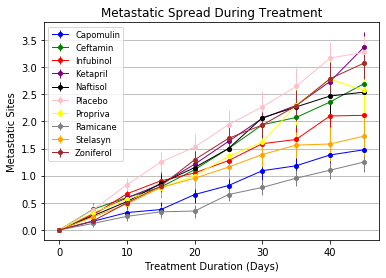

In [88]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Capomulin"], yerr=sem_met_sites_pivot["Capomulin"], color="blue", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Ceftamin"], yerr=sem_met_sites_pivot["Ceftamin"], color="green", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Infubinol"], yerr=sem_met_sites_pivot["Infubinol"], color="red", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Ketapril"], yerr=sem_met_sites_pivot["Ketapril"], color="purple", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Naftisol"], yerr=sem_met_sites_pivot["Naftisol"], color="black", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Placebo"], yerr=sem_met_sites_pivot["Placebo"], color="pink", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Propriva"], yerr=sem_met_sites_pivot["Propriva"], color="yellow", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Ramicane"], yerr=sem_met_sites_pivot["Ramicane"], color="grey", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Stelasyn"], yerr=sem_met_sites_pivot["Stelasyn"], color="orange", marker="o", markersize=4, linewidth=1)
plt.errorbar(mean_met_sites_pivot.index, mean_met_sites_pivot["Zoniferol"], yerr=sem_met_sites_pivot["Zoniferol"], color="brown", marker="o", markersize=4, linewidth=1)


plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'  ],loc="best", fontsize="small", fancybox=True)

# Show the Figure
plt.show()

## Survival Rates

In [110]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
mouse_count = pd.DataFrame({"Mouse Count": mouse_count})

# Preview DataFrame
mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [111]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count.reset_index()
mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
mouse_count_pivot.head()
                                        


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


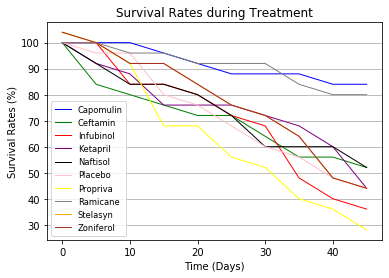

In [128]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mouse_count_pivot["Capomulin"] / 25, "blue", markersize=3, linewidth=1)
plt.plot(100 * mouse_count_pivot["Ceftamin"] / 25, "green", markersize=3, linewidth=1)
plt.plot(100 * mouse_count_pivot["Infubinol"] / 25, "red", markersize=3, linewidth=1)
plt.plot(100 * mouse_count_pivot["Ketapril"] / 25, "purple", markersize=3, linewidth=1)
plt.plot(100 * mouse_count_pivot["Naftisol"] / 25, "black", markersize=3, linewidth=1)
plt.plot(100 * mouse_count_pivot["Placebo"] / 25, "pink", markersize=3, linewidth=1)
plt.plot(100 * mouse_count_pivot["Propriva"] / 25, "yellow", markersize=3, linewidth=1)
plt.plot(100 * mouse_count_pivot["Ramicane"] / 25, "grey", markersize=3, linewidth=1)
plt.plot(100 * mouse_count_pivot["Stelasyn"] / 25, "orange", markersize=3, linewidth=1)
plt.plot(100 * mouse_count_pivot["Stelasyn"] / 25, "brown", markersize=3, linewidth=1)

plt.title("Survival Rates during Treatment")
plt.ylabel("Survival Rates (%)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'  ],loc="best", fontsize="small", fancybox=True)

# Show the Figure
plt.show()

## Summary Bar Graph

In [131]:
# Calculate the percent changes for each drug
pct_change =  100 * (mean_tumor_vol_pivot.iloc[-1] - mean_tumor_vol_pivot.iloc[0]) / mean_tumor_vol_pivot.iloc[0]
pct_change_sem =  100 * (sem_tumor_vol_pivot.iloc[-1] - sem_tumor_vol_pivot.iloc[0]) / sem_tumor_vol_pivot.iloc[0]

# Display the data to confirm
pct_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

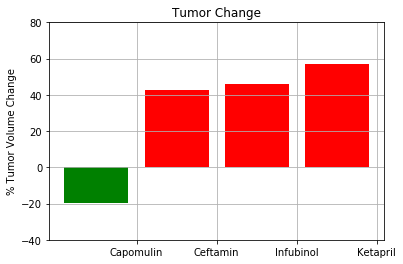

In [152]:
# Store all Relevant Percent Changes into a Tuple
drug_pct_changes = (pct_change["Capomulin"], 
                pct_change["Ceftamin"], 
                pct_change["Infubinol"], 
                pct_change["Ketapril"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(drug_pct_changes)) 
width = 0.3

Pass = ax.bar(ind[0], drug_pct_changes[0], color='green')
Fail = ax.bar(ind[1:], drug_pct_changes[1:], color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril'))
ax.set_autoscaley_on(False)
ax.set_ylim([-40,80])
ax.grid(True)

# Use functions to label the percentages of changes

# Call functions to implement the function calls

# Save the Figure


# Show the Figure
fig.show()